In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
%matplotlib inline

In [4]:
cols = ['sentiment','id','date','query_string','user','text']

In [5]:
df = pd.read_csv("../data/twitter_corpse/training.1600000.processed.noemoticon.csv",header=None, names=cols,encoding = "ISO-8859-1")

In [6]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df.groupby('sentiment').count()

,id,date,query_string,user,text
sentiment,,,,,
0,800000,800000,800000,800000,800000
4,800000,800000,800000,800000,800000


In [8]:
df.describe()

,sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
sentiment       1600000 non-null int64
id              1600000 non-null int64
date            1600000 non-null object
query_string    1600000 non-null object
user            1600000 non-null object
text            1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [11]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [12]:
df.head(5)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [13]:
df[df.sentiment == 0].head(5)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [14]:
df[df.sentiment == 4].head(5)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


In [15]:
df['senetry_check']=[len(t) for t in df.text]

In [16]:
df.head()

,sentiment,text,senetry_check
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [17]:
from pprint import pprint

In [18]:
data_dist = {
    'sentiment': {
        'type': df.sentiment.dtype,
        'discription': 'sentiment class: 0=nevative,1=positive'
    },
    'text': {
        'type': df.text.dtype,
        'discription': 'tweet text'
    },
    'senetry_check': {
        'type': df.senetry_check.dtype,
        'discription': 'tweet length'
    },
    'data_shape':df.shape
}

In [19]:
pprint(data_dist)

{'data_shape': (1600000, 3),
 'senetry_check': {'discription': 'tweet length', 'type': dtype('int64')},
 'sentiment': {'discription': 'sentiment class: 0=nevative,1=positive',
               'type': dtype('int64')},
 'text': {'discription': 'tweet text', 'type': dtype('O')}}


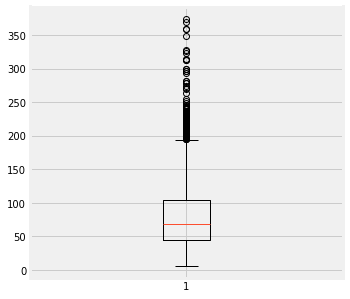

In [20]:
fig,ax =plt.subplots(figsize=(5,5))
plt.boxplot(df.senetry_check)
plt.show()

In [21]:
df[df.senetry_check >= 140].head(10)

,sentiment,text,senetry_check
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
535,0,Why Kutner? I mean I knew something was going ...,140
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141


In [22]:
df.text[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [23]:
from bs4 import BeautifulSoup

In [24]:
example = BeautifulSoup(df.text[279],'lxml')

In [25]:
example.get_text()

"Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. "

In [26]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [27]:
import re
re.sub(r'@[A-Za-z0-9_]+','',df.text[343])


' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [28]:
df.text[0]


"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [29]:
df.head()

,sentiment,text,senetry_check
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [30]:
df.rename({'senetry_check':'len'},axis=1,inplace=True)

In [31]:
df.head(5)

,sentiment,text,len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [32]:
re.sub(r'https?://[^ ]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [33]:
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [34]:
df.text[226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [35]:
df.text[226].replace('ï¿½','?')

'Tuesday?ll start with reflection ?n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [36]:
df.text[175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [37]:
re.sub('[^a-zA-Z]',' ',df.text[175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

In [38]:
from nltk.tokenize  import  WordPunctTokenizer


In [39]:
tok = WordPunctTokenizer()

In [40]:
part1 = r'@[a-zA-Z0-9_]+'

In [41]:
part2 = r'https?://[^ ]+'

In [42]:
combined_part = part1+'|'+part2

In [43]:
www_pat =r'www.[^ ]+'

In [44]:
negations_dic = {
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "won't": "will not",
    "wouldn't": "would not",
    "don't": "do not",
    "doesn't": "does not",
    "didn't": "did not",
    "can't": "can not",
    "couldn't": "could not",
    "shouldn't": "should not",
    "mightn't": "might not",
    "mustn't": "must not"
}

In [45]:
neg_pattern =re.compile(r'\b(' + '|'.join(negations_dic.keys())+ r')\b')

In [46]:
neg_pattern

re.compile(r"\b(isn't|aren't|wasn't|weren't|haven't|hasn't|hadn't|won't|wouldn't|don't|doesn't|didn't|can't|couldn't|shouldn't|mightn't|mustn't)\b",
re.UNICODE)

In [47]:
combined_part

'@[a-zA-Z0-9_]+|https?://[^ ]+'

In [48]:
combined_part = r'|'.join((part1,part2))

In [49]:
combined_part

'@[a-zA-Z0-9_]+|https?://[^ ]+'

In [50]:
def twitter_clean(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    striped = re.sub(combined_part, '', souped)
    striped = re.sub(www_pat, '', striped)

    try:
        clean = striped
    except:
        clean = striped

    lower_case = clean.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()],
                                  lower_case)
    letters_only = re.sub(r'[^a-zA-Z]', ' ', neg_handled)
    words = [x for x in tok.tokenize(letters_only) if len(x) > 1]
    return ' '.join(words).strip()


testing = df.text[:100]
test_resullt = []
for t in testing:
    test_resullt.append(twitter_clean(t))
test_resullt

['awww that bummer you shoulda got david carr of third day to do it',
 'is upset that he can not update his facebook by texting it and might cry as result school today also blah',
 'dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it not behaving at all mad why am here because can not see you all over there',
 'not the whole crew',
 'need hug',
 'hey long time no see yes rains bit only bit lol fine thanks how you',
 'nope they did not have it',
 'que me muera',
 'spring break in plain city it snowing',
 'just re pierced my ears',
 'could not bear to watch it and thought the ua loss was embarrassing',
 'it it counts idk why did either you never talk to me anymore',
 'would ve been the first but did not have gun not really though zac snyder just doucheclown',
 'wish got to watch it with you miss you and how was the premiere',
 'hollis death scene will hurt me severely to watch on film wry is directors cut no

In [51]:
nums = [0,400000,800000,1200000,1600000]

In [52]:
print('cleaning and parsing of tweet tarted')

cleaning and parsing of tweet tarted


In [53]:
clean_twitter_text = []

In [54]:
for  x in enumerate(range(1600000)):
    if x[0]%10000 ==0:
        print('{} tweets proceed'.format(x[0]))
    #clean_twitter_text.append(twitter_clean(df.text[x[0]]))

0 tweets proceed
10000 tweets proceed
20000 tweets proceed
30000 tweets proceed
40000 tweets proceed
50000 tweets proceed
60000 tweets proceed
70000 tweets proceed
80000 tweets proceed
90000 tweets proceed
100000 tweets proceed
110000 tweets proceed
120000 tweets proceed
130000 tweets proceed
140000 tweets proceed
150000 tweets proceed
160000 tweets proceed
170000 tweets proceed
180000 tweets proceed
190000 tweets proceed
200000 tweets proceed
210000 tweets proceed
220000 tweets proceed
230000 tweets proceed
240000 tweets proceed
250000 tweets proceed
260000 tweets proceed
270000 tweets proceed
280000 tweets proceed
290000 tweets proceed
300000 tweets proceed
310000 tweets proceed
320000 tweets proceed
330000 tweets proceed
340000 tweets proceed
350000 tweets proceed
360000 tweets proceed
370000 tweets proceed
380000 tweets proceed
390000 tweets proceed
400000 tweets proceed
410000 tweets proceed
420000 tweets proceed
430000 tweets proceed
440000 tweets proceed
450000 tweets proceed
46

In [55]:
clean_df =pd.DataFrame(clean_twitter_text,columns=['text'])

In [56]:
clean_df['target'] =df.sentiment

In [57]:
clean_df.head()

,text,target
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0


In [65]:
#data save
#clean_df.to_pickle('../data/tesing_data/sentiment_clean_df')
#clean_df = pd.read_pickle('../data/tesing_data/sentiment_clean_df')

In [66]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1600000 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [67]:
clean_df[clean_df.isnull().any(axis =1)].index

Int64Index([], dtype='int64')

In [68]:
neg_pattern.sub(lambda x: print(x.group()),"is upset that he can't update his don't Facebook by")

can't
don't


'is upset that he  update his  Facebook by'

In [69]:
neg_pattern.findall("is upset that he can't update his don't Facebook by")

["can't", "don't"]

In [70]:
clean_df['text_len']=clean_df.text.apply(lambda x : len(x))

In [71]:
clean_df[clean_df.text_len == 0].head()

,text,target,text_len
208,,0,0
249,,0,0
282,,0,0
398,,0,0
430,,0,0


In [72]:
clean_df['text'] =clean_df.text.apply(lambda x: x if len(x)>0 else np.NAN)

In [73]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
text        1596041 non-null object
target      1600000 non-null int64
text_len    1600000 non-null int64
dtypes: int64(2), object(1)
memory usage: 36.6+ MB


In [74]:
df.iloc[clean_df[clean_df.isnull().any(axis=1)].index,:].head()

,sentiment,text,len
208,0,@mandayyy,10
249,0,@mandayyy,12
282,0,@ITS_NEMESIS -------,21
398,0,@danadearmond,14
430,0,@anistorm,10


In [75]:
clean_df.dropna(inplace=True)

In [76]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596041 entries, 0 to 1599999
Data columns (total 3 columns):
text        1596041 non-null object
target      1596041 non-null int64
text_len    1596041 non-null int64
dtypes: int64(2), object(1)
memory usage: 48.7+ MB


In [77]:
neg_tweets = clean_df[clean_df.target == 0]

In [78]:
neg_tweets.head()

,text,target,text_len
0,awww that bummer you shoulda got david carr of...,0,65
1,is upset that he can not update his facebook b...,0,105
2,dived many times for the ball managed to save ...,0,71
3,my whole body feels itchy and like its on fire,0,46
4,no it not behaving at all mad why am here beca...,0,80


In [79]:
neg_string = []

In [80]:
for t in neg_tweets.text:
    neg_string.append(t)
neg_string= pd.Series(neg_string).str.cat(sep =' ')

In [81]:
negg_=' '.join([t for t in neg_tweets.text])

In [82]:
negg_[:1000]

'awww that bummer you shoulda got david carr of third day to do it is upset that he can not update his facebook by texting it and might cry as result school today also blah dived many times for the ball managed to save the rest go out of bounds my whole body feels itchy and like its on fire no it not behaving at all mad why am here because can not see you all over there not the whole crew need hug hey long time no see yes rains bit only bit lol fine thanks how you nope they did not have it que me muera spring break in plain city it snowing just re pierced my ears could not bear to watch it and thought the ua loss was embarrassing it it counts idk why did either you never talk to me anymore would ve been the first but did not have gun not really though zac snyder just doucheclown wish got to watch it with you miss you and how was the premiere hollis death scene will hurt me severely to watch on film wry is directors cut not out now about to file taxes ahh ive always wanted to see rent l

In [83]:
from wordcloud import WordCloud

In [84]:
word_cloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(negg_)

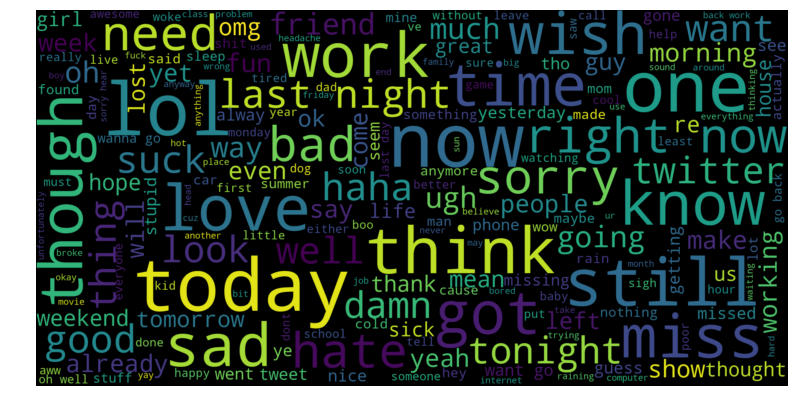

In [85]:
plt.figure(figsize=(12,10))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [86]:
for t in neg_tweets.text[:100]:
    if 'love' in t:
        print(t)

ahh ive always wanted to see rent love the soundtrack
meh almost lover is the exception this track gets me depressed every time
awe love you too am here miss you


In [87]:
word_cloud.words_

{'actually': 0.25355123431250864,
 'already': 0.3767756171562543,
 'alway': 0.27996138463660186,
 'another': 0.1759067714797959,
 'anymore': 0.254309750379258,
 'anything': 0.1788718797407254,
 'anyway': 0.165770238587781,
 'around': 0.16446007447248656,
 'awesome': 0.2100399944835195,
 'aww': 0.20755757826506688,
 'baby': 0.19252516894221486,
 'back work': 0.18445731623224382,
 'bad': 0.564404909667632,
 'believe': 0.16714935870914358,
 'better': 0.18990484071162597,
 'big': 0.18280237208660874,
 'bit': 0.17749275961936284,
 'boo': 0.21983174734519376,
 'bored': 0.16714935870914358,
 'boy': 0.1698386429458006,
 'broke': 0.1638394704178734,
 'call': 0.19900703351261895,
 'car': 0.26548062336229483,
 'cause': 0.23782926492897533,
 'class': 0.16177079023582955,
 'cold': 0.23913942904426977,
 'come': 0.34843469866225346,
 'computer': 0.1759067714797959,
 'cool': 0.19418011308784996,
 'cuz': 0.18163011998345055,
 'dad': 0.20321334988277479,
 'damn': 0.4739346297062474,
 'day': 0.2562405185

In [88]:
pos_tweet = clean_df[clean_df['target']==4]

In [89]:
poss_=' '.join([t for t in pos_tweet.text])

In [90]:
poss_[:1000]

'love guys the best im meeting up with one of my besties tonight cant wait girl talk thanks for the twitter add sunisa got to meet you once at hin show here in the dc area and you were sweetheart being sick can be really cheap when it hurts too much to eat real food plus your friends make you soup he has that effect on everyone you can tell him that just burst out laughing really loud because of that thanks for making me come out of my sulk thans for your response ihad already find this answer am so jealous hope you had great time in vegas how did you like the acm love your show ah congrats mr fletcher for finally joining twitter responded stupid cat is helping me type forgive errors crazy day of school there for hours straiiight about to watch the hills told me too ha happy birthday jb how did forget about two and half men love that show haha do not worry you ll get the hang of it at least will not be the only one feeling lost this may cause me many later than usual nights already add

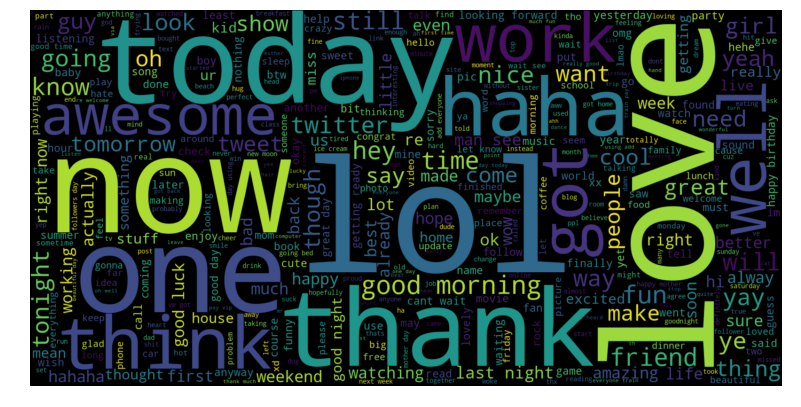

In [91]:
word_cloud_pos = WordCloud(width=1600,height=800,max_words=400).generate(poss_)
plt.figure(figsize=(12,8))
plt.imshow(word_cloud_pos,interpolation='bilinear')
plt.axis('off')
plt.show()

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
cvec = CountVectorizer()


In [94]:
cvec.fit(clean_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [95]:
len(cvec.get_feature_names())

264939

In [96]:
neg_doc_matrix =cvec.transform(clean_df[clean_df['target']==0].text)

In [97]:
pos_doc_matrix = cvec.transform(clean_df[clean_df['target']==4].text)

In [98]:
pos_doc_matrix.shape

(797844, 264939)

In [99]:
neg_tf = np.sum(neg_doc_matrix,axis=0)

In [100]:
pos_tf = np.sum(pos_doc_matrix,axis=0)

In [101]:
neg = np.squeeze(np.asarray(neg_tf))

In [102]:
neg

array([160,  93,  45, ...,   0,   1,   1], dtype=int64)

In [103]:
pos = np.squeeze(np.asarray(pos_tf))

In [104]:
pos

array([92, 54, 29, ...,  1,  0,  0], dtype=int64)

In [105]:
cvec.get_feature_names()[:100]

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaa',
 'aaaaaaaaa',
 'aaaaaaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaaaa',
 'aaaaaaaaaaaaa',
 'aaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaall',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaao',
 'aaaaaaaaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh',
 'aaaaaaaaaaaaaaaaaaaaaaahrg',
 'aaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaahhhhh',
 'aaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaint',
 'aaa

In [106]:
term_freq_array = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [107]:
term_freq_array[23232:23232333].describe()

,0,1
count,241707.000000,241707.000000
mean,36.322117,33.609519
std,1379.309374,1240.006523
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,313162.000000,265998.000000


In [108]:
pd.DataFrame([neg,pos],columns=cvec.get_feature_names())

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaa,aaaaaaaaa,aaaaaaaaaa,aaaaaaaaaaa,...,zzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,160,93,45,26,16,9,13,6,6,4,...,1,1,0,1,0,0,0,0,1,1
1,92,54,29,12,12,1,0,2,3,1,...,1,0,1,2,1,1,3,1,0,0


In [109]:
clean_df.head()

,text,target,text_len
0,awww that bummer you shoulda got david carr of...,0,65
1,is upset that he can not update his facebook b...,0,105
2,dived many times for the ball managed to save ...,0,71
3,my whole body feels itchy and like its on fire,0,46
4,no it not behaving at all mad why am here beca...,0,80


In [110]:
term_freq_array[99999:999999]

,0,1
hedgie,3,0
hedging,1,1
hedi,1,3
hedin,3,0
heding,2,1
hedison,0,1
hedland,1,1
hedley,6,2
hedleyyyyy,1,0
hedlytz,1,0


In [111]:
pos_doc_matrix[1:][0,:].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [112]:
clean_df[clean_df['target']==4].text.head(2)

800000                                   love guys the best
800001    im meeting up with one of my besties tonight c...
Name: text, dtype: object